<h2><font color="#004D7F" size=6>Módulo 4. Fase de tratamiento de datos</font></h2>



<h1><font color="#004D7F" size=5>3. Feature Importance</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Métricas de clasificación](#section2)
    * [2.1. Decision Trees](#section21)
    * [2.2. Extra Trees](#section22)
    * [2.3. Random Forest](#section23)
    * [2.4. LASSO](#section24)
* [3. Reducción de dimensiones](#section3)

In [20]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

C:\Users\eel20\AppData\Local\Temp\ipykernel_14512\1126351303.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

En resumen, feature selection, también llamado como selección de mejores características o atributos, es el proceso de seleccionar un subconjunto de características pertinentes (variables, predictores) para su uso en construcción de modelos. Las técnicas de feature selection son utilizadas por cuatro razones:
* Simplificación de modelos con el fin de hacerlas más sencillas de interpretar para los usuarios/investigadores.
* Menor tiempo de entrenamiento.
* Evitar la maldición de la dimensionalidad:
* Generalización realzada por reducir _overfitting_ (formalmente, reducción de varianza).

<a id="section11"></a>
## <font color="#004D7F"> 1.1. CSV</font>

En esta lección, se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión. En cada código, el conjunto de datos se descarga directamente del repositorio de UCI Machine Learning.
* **Clasificación**: se usará el conjunto de datos de Pima Indians Diabetes. Este es un problema de clasificación binaria donde todas las características de entrada son numéricas.

In [21]:
# Clasification problem
import pandas as pd
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
df_cla = pd.read_csv(filename, names=names)
array = df_cla.values
X_cla = array[:,0:8]
Y_cla = array[:,8]

In [22]:
#importing libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
wisconsin = load_breast_cancer()
df_wisconsin = pd.DataFrame(wisconsin.data, columns = wisconsin.feature_names)
X_wisconsin = wisconsin.data
y_wisconsin = wisconsin.target
#df_wisconsin
#wisconsin.target   # 0 si no tinee cancer y 1 si tiene cancer
print(df_wisconsin) # todo
print(df_wisconsin.columns) # columns
wisconsin.data
wisconsin.target
df_wisconsin

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


* **Regresión**: se usará el conjunto de datos Boston House Price. Este es un problema de regresión donde todas las características de entrada también son numéricas. En esta práctica lo trabajaremos directamente desde scikit-learn.

In [23]:
#importing libraries
##from sklearn.datasets import load_boston
##import pandas as pd
##x_reg = load_boston()
##df_reg = pd.DataFrame(x_reg.data, columns = x_reg.feature_names)
##df_reg["MEDV"] = x_reg.target
##X_reg = df_reg.drop("MEDV",1)   #Feature Matrix
##y_reg = df_reg["MEDV"]

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Librerías</font>

Por último vamos a declarar algunas librerías generales que ya hemos estado trabajando y que usaremos a lo largo de la sección.

In [24]:
#importing libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Técnicas de Feature Importance</font>

La importancia de las características se puede estimar a partir de datos mediante la construcción de un modelo. Algunos métodos como los árboles de decisión tienen un mecanismo incorporado para informar sobre la importancia variable. Para otros algoritmos, la importancia se puede estimar utilizando un análisis de curva ROC realizado para cada atributo. Aunque veremos algunos de estos modelos pueden utilizarse muchos otros.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Decision Trees </font>

Los árboles de decisión hacen un particionamiento del espacio de entrada mediante una estrategia voraz. En cada paso, eligen la variable óptima. Si se limita la profundidad del árbol, también se limita el número de nodos y, por tanto, el número de variables, por ejemplo, un árbol (variables contínuas) con profundidad 5 tendría a como máximo 63 nodos (26 - 1). Por tanto, utilizaría, a lo sumo, 63 variables.

Podemos observar que el resultado que el mejor resultado se obtiene utilizando 6 de las 30 variables originales

In [25]:
# Libraríes
## from sklearn.tree import DecisionTreeRegressor
## from sklearn.metrics import accuracy_score
## 
## # Genera la partición
## X_train, X_test, Y_train, Y_test = train_test_split(X_wisconsin, y_wisconsin, test_size=0.2, random_state=7)
## 
## # Aprende el modelo
## depth = 3  ## con mucha profundidad es más fácil entrar en overfitting
## tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth=depth)
## #tree = DecisionTreeRegressor(criterion = 'mse', max_depth=depth)
## tree.fit(X_train, Y_train)
## 
## # Extrae los índices de las variables utilizadas
## subset = np.unique(tree.tree_.feature[tree.tree_.feature >= 0])
## print(f"variables: {X_wisconsin.shape[0]}")
## print(f"variables: {X_wisconsin.shape[1]}")
## print(f"Variables Utilizadas: {subset}")
## print(f"Trainning: {tree.score(X_train, Y_train).round(2)}")
## #verificar test para saber si no hubo overfitting
## print(f"test: {tree.score(X_test, Y_test).round(2)}")
## print(df_wisconsin.columns[1], df_wisconsin.columns[16], 
##       df_wisconsin.columns[22], df_wisconsin.columns[23], 
##       df_wisconsin.columns[26], df_wisconsin.columns[27]) #características que fueron usadas con esta técnica


# Libraríes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Genera la partición
X_train, X_test, Y_train, Y_test = train_test_split(X_wisconsin, y_wisconsin, test_size=0.2, random_state=7)

# Aprende el modelo
depth = 3 #9  ## con mucha profundidad es mas facil entrar en over fitting
tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth=depth)
#tree = DecisionTreeRegressor(criterion = 'mse', max_depth=depth)
tree.fit(X_train, Y_train)

# Extrae los índices de las variables utilizadas
subset = np.unique(tree.tree_.feature[tree.tree_.feature >= 0])
print(f"variables: {X_wisconsin.shape[0]}")
print(f"variables: {X_wisconsin.shape[1]}")
print(f"Variables Utilizadas: {subset}")
print(f"Trainning: {tree.score(X_train, Y_train).round(2)}")
#verificar test para saber si no hubo over fitting
print(f"test: {tree.score(X_test, Y_test).round(2)}")
print(df_wisconsin.columns[1], df_wisconsin.columns[13], 
      df_wisconsin.columns[21], df_wisconsin.columns[23], 
      df_wisconsin.columns[26], df_wisconsin.columns[27]) #caracteristricas quie fueron usadas con esta tecnica



#############   conjunto de datos para hacer con mas profundidad en el arbol     #################
## print(df_wisconsin.columns[1], df_wisconsin.columns[7], 
##       df_wisconsin.columns[8], df_wisconsin.columns[10], 
##       df_wisconsin.columns[11], df_wisconsin.columns[13], 
##       df_wisconsin.columns[14], df_wisconsin.columns[15], 
##       df_wisconsin.columns[20], df_wisconsin.columns[21], 
##       df_wisconsin.columns[22], df_wisconsin.columns[23], 
##       df_wisconsin.columns[26], df_wisconsin.columns[27]) #caracteristricas quie fueron usadas con esta tecnica
## 

variables: 569
variables: 30
Variables Utilizadas: [ 1  2 21 23 26 27]
Trainning: 0.9
test: 0.69
mean texture area error worst texture worst area worst concavity worst concave points


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
En este caso tenemos que tener mucho cuidado con la profundidad del árbol que utilizamos porque podemos caer en _overfitting._
</div> 

Con la herramienta **graphviz** y **pydotplus** podemos ver como quedaría construído el árbol. En el caso de sistemas Linux deberás instalarla también en su máquina original `sudo apt install graphviz`.

In [26]:
# !pip install --upgrade GraphViz 
# !pip install pydotplus 
# !pip install six
# !pip install --upgrade mglearn
# !pip install python-graphviz

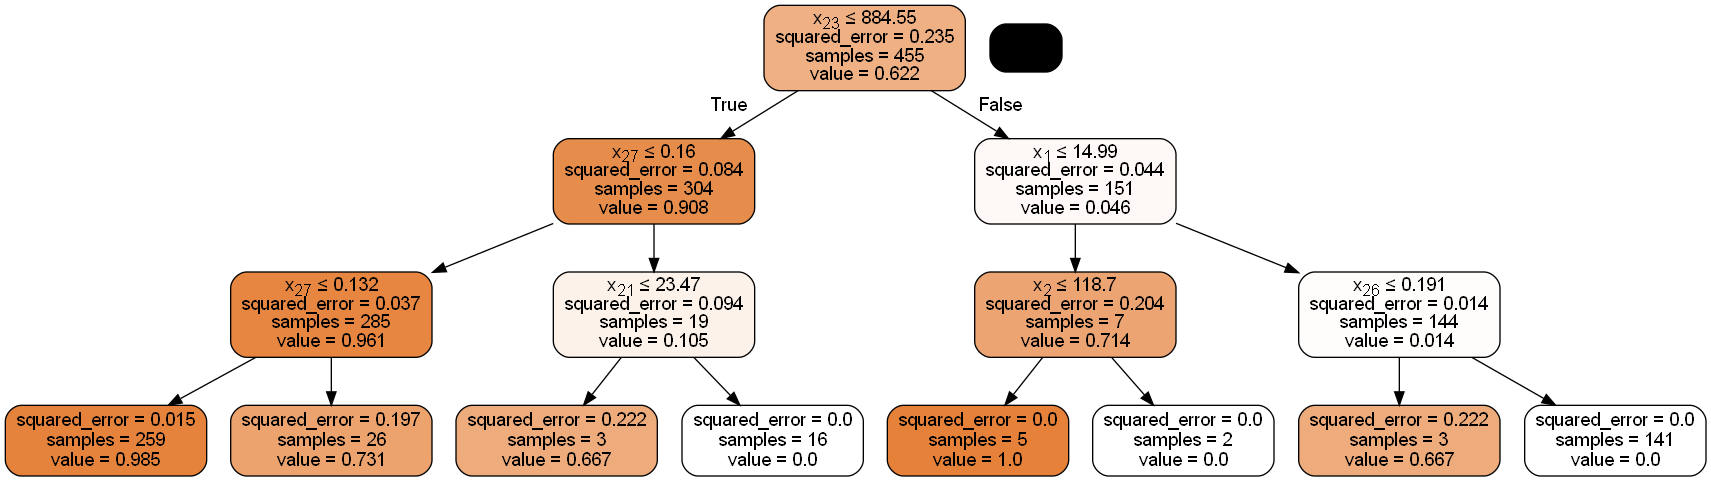

In [27]:
# PAra mostrar como ha generado el árbol
##from sklearn.externals.six import StringIO  
##from IPython.display import Image  
##from sklearn.tree import export_graphviz
##import pydotplus
##dot_data = StringIO()
##export_graphviz(tree, out_file=dot_data,  
##                filled=True, rounded=True,
##                special_characters=True)
##graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
##Image(graph.create_png())



# PAra mostrar como ha generado el árbol
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Extra Trees </font>

Se pueden usar árboles de decisión tipo bagged como Random Forest y Extra Trees para estimar la importancia de las características. En el siguiente ejemplo, construimos un clasificador `ExtraTreesClassifier` para el inicio del conjunto de datos de diabetes de Pima Indians. 

Puede ver que se nos da un puntaje de importancia para cada atributo, donde cuanto mayor es el puntaje, más importante es el atributo. Los puntajes sugieren la importancia de _plas, age_ y _mass._

In [28]:
# Libraríes
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X_cla, Y_cla)
print(list(df_cla.columns))
print(model.feature_importances_)


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[0.10952722 0.22875793 0.09786505 0.08193202 0.07407153 0.14210933
 0.11661536 0.14912156]


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Puede obtener más información sobre la clase [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
</div> 

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Random Forest </font>

En su formulación original, el algoritmo Random Forest computa también la importancia de las variables

In [29]:
# Libraríes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Genera la partición
X_train, X_test, Y_train, Y_test = train_test_split(X_wisconsin, y_wisconsin, test_size=0.2, random_state=7)

# Entrenamos al algoritmo
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, Y_train)

# Extrae las importancias
importances = forest.feature_importances_
Y_pred = forest.predict(X_test)
print(f"Error (con todas las variables): {accuracy_score(Y_test, Y_pred)}")

Error (con todas las variables): 0.9736842105263158


In [30]:
## si tenemos un accuraci menor al 80 % sera mejor ver cuales son unas caracteristaas interesantes y cuales no lo son 
## para asi mejorar nuestro porcentaje de acierto 

In [31]:
# Extrae los índices ordenados de menor a mayor
ranking = np.argsort(forest.feature_importances_)
print(wisconsin.feature_names[ranking])

['mean symmetry' 'texture error' 'compactness error' 'symmetry error'
 'concave points error' 'smoothness error' 'mean fractal dimension'
 'fractal dimension error' 'concavity error' 'worst fractal dimension'
 'mean compactness' 'mean smoothness' 'radius error' 'worst smoothness'
 'worst compactness' 'mean texture' 'worst symmetry' 'worst texture'
 'worst concavity' 'perimeter error' 'mean concavity' 'area error'
 'mean area' 'mean radius' 'mean perimeter' 'worst area' 'worst radius'
 'mean concave points' 'worst concave points' 'worst perimeter']


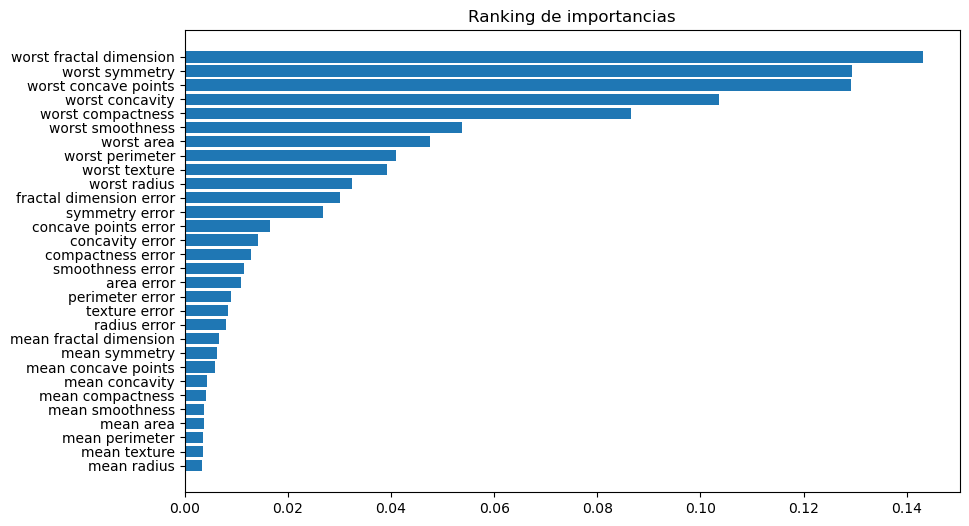

In [32]:
#dibujarlo el rnakkin de importancia de arriba
plt.figure(figsize=(10,6))
plt.title("Ranking de importancias")
plt.barh(range(X_wisconsin.shape[1]), importances[ranking])
plt.yticks(range(X_wisconsin.shape[1]), wisconsin.feature_names)
plt.show()

Y con estas características podemos ver si ha mejorado nuestros resultados eliminando las 5 características que, según Random Forest tenían menos importancia.

In [34]:
# cvrear las predicciones eliminando las peores 5 caracteristicas
forest.fit(X_train[ : , ranking[-5:]], Y_train)
Y_pred = forest.predict(X_test[: , ranking[-5:]])
print(f"Error (sin 5 ultimas caracteristicas): {accuracy_score(Y_test, Y_pred)} ")

Error (sin 5 ultimas caracteristicas): 0.9298245614035088 


<a id="section24"></a>
## <font color="#004D7F"> 2.4. LASSO </font>

La importancia de las características se puede estimar a partir de los datos mediante la construcción de un modelo. Algunos métodos como los árboles de decisión tienen un mecanismo incorporado para informar sobre la importancia variable. Para otros algoritmos, la importancia se puede estimar utilizando un análisis de curva ROC realizado para cada atributo.

En este caso el modelo LASSO ha tomado todas las características excepto _NOX, CHAS_ e _INDUS._ Así mismo podemos utilizar otros modelos como RIDGE o Linear Regression por ejemplo.

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444
Lasso picked 10 variables and eliminated the other 3 variables


/home/manwest/Documentos/enviroment/modulo1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5, 1.0, 'Feature importance using Lasso Model')

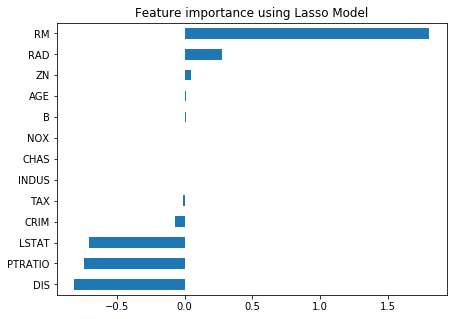

In [29]:
# Future imoprtance - LASSO
# Libraríes
???
# feature importance
???
# features picked and eliminated
???
# Show de coeficient
???

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Reducción de dimensiones </font>

PCA es un procedimiento estadístico que utiliza una transformación ortogonal que convierte un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas. Es decir, identifica pautas en nuestro dato basado en las correlaciones entre características. Esta correlación implica que hay redundancia en nuestros datos, en otras palabras, que hay parte de los datos que se pueden explicar por relaciones con otras partes de los mismos.

Estos datos correlacionados no son necesarios para el aprendizaje correcto del modelo, y por tanto pueden ser eliminados. Se pueden eliminar borrando directamente ciertas columnas (características) o combinando un número de ellos y obteniendo nuevos datos que contengan la mayoría de la información. 

En este caso podemos ver que hemos creado 3 componentes con PCA, es decir, hemos sustituido las características originales por los 3 componentes que nos da este tipo de transformación.

In [31]:
# Feature Extraction with PCA
# Libraríes
???
# PCA con k=3
???
# summarize components
???
# Convertimos a dataframe
???

Explained Variance: [0.88854663 0.06159078 0.02579012]
Componentes:
 [[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]


,PC1,PC2,PC3
0,-75.714655,-35.950783,-7.260789
1,-82.358268,28.908213,-5.496671
2,-74.630643,-67.906496,19.461808


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>